In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pickle
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [3]:
# Load Dataset
df = pd.read_csv("telco.csv")

In [4]:
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [5]:
df.shape

(7043, 50)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [7]:
df = df.drop(['Customer ID'], axis = 1)
df.head()

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [8]:
features = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in features:
    print(col, df[col].unique())
    print("-"*50)

Gender ['Male' 'Female']
--------------------------------------------------
Age [78 74 71 80 72 76 66 70 77 65 67 68 69 79 75 73 37 19 31 23 38 21 29 61
 27 20 56 51 48 32 34 41 30 26 62 64 45 53 63 42 24 54 39 43 50 22 40 47
 60 52 55 59 49 58 25 28 33 44 57 46 36 35]
--------------------------------------------------
Under 30 ['No' 'Yes']
--------------------------------------------------
Senior Citizen ['Yes' 'No']
--------------------------------------------------
Married ['No' 'Yes']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
Number of Dependents [0 1 3 2 5 4 6 7 8 9]
--------------------------------------------------
Country ['United States']
--------------------------------------------------
State ['California']
--------------------------------------------------
City ['Los Angeles' 'Inglewood' 'Whittier' ... 'Topaz' 'Jacumba' 'Holtville']
--------------------------------------------------
Zip Code

In [9]:
df.isnull().sum()


Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                     

In [10]:
df["Total Charges"].values

# Values of this feature is object type , we have to convert it to float type

array([  39.65,  633.3 , 1752.55, ..., 7362.9 ,  346.45, 6844.5 ],
      shape=(7043,))

In [11]:
df[df["Total Charges"]==" "]

# Also there are some blank spaces

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason


In [12]:
len(df[df["Total Charges"]==" "])

0

In [13]:
df["Total Charges"] = df["Total Charges"].replace({" ": "0.0"})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Under 30                           7043 non-null   object 
 3   Senior Citizen                     7043 non-null   object 
 4   Married                            7043 non-null   object 
 5   Dependents                         7043 non-null   object 
 6   Number of Dependents               7043 non-null   int64  
 7   Country                            7043 non-null   object 
 8   State                              7043 non-null   object 
 9   City                               7043 non-null   object 
 10  Zip Code                           7043 non-null   int64  
 11  Latitude                           7043 non-null   float

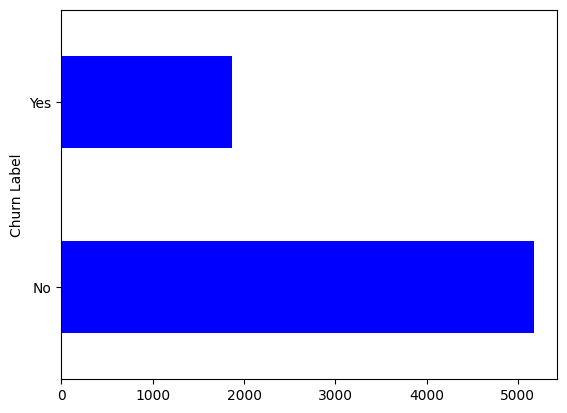

In [15]:
df['Churn Label'].value_counts().plot(kind='barh' , color = 'blue');

In [16]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


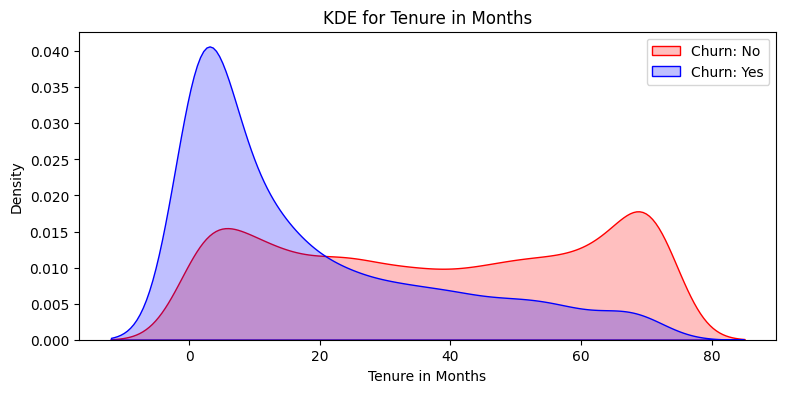

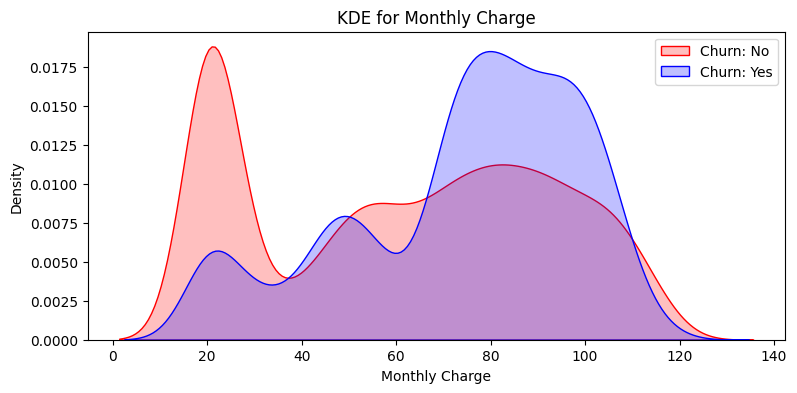

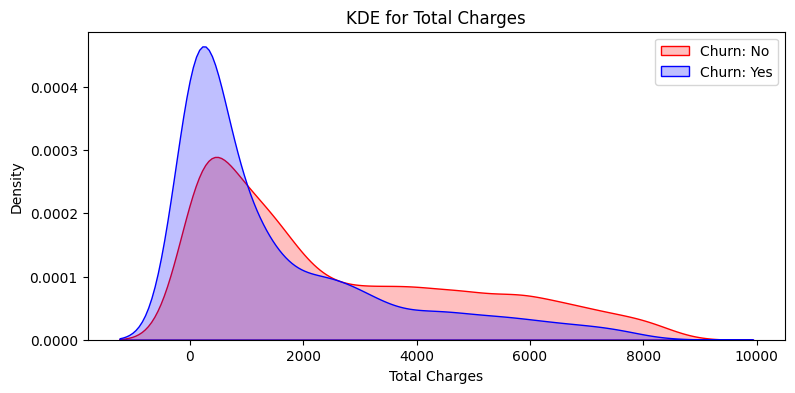

In [17]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title(f"KDE for {feature}")

    ax0 = sns.kdeplot(df[df['Churn Label'] == 'No'][feature].dropna(), color='red', label='Churn: No', shade=True)
    ax1 = sns.kdeplot(df[df['Churn Label'] == 'Yes'][feature].dropna(), color='blue', label='Churn: Yes', shade=True)
    
    plt.legend()  # legend
    plt.show()  # Ensure the plot is displayed properly

kdeplot('Tenure in Months')
kdeplot('Monthly Charge')
kdeplot('Total Charges')


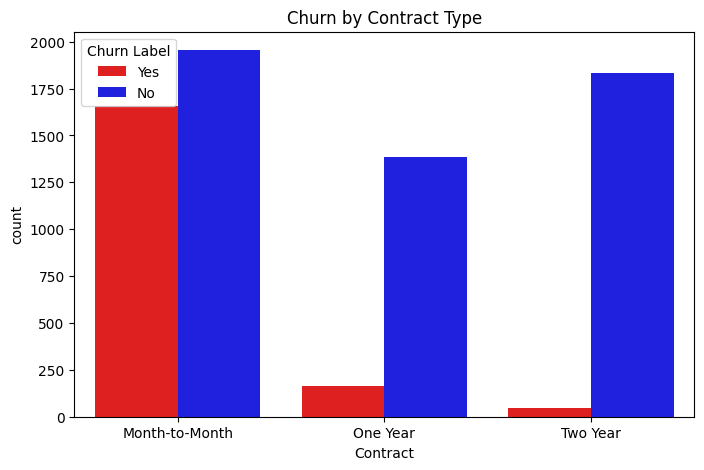

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn Label', data=df, palette=['red', 'blue'])
plt.title('Churn by Contract Type')
plt.show()

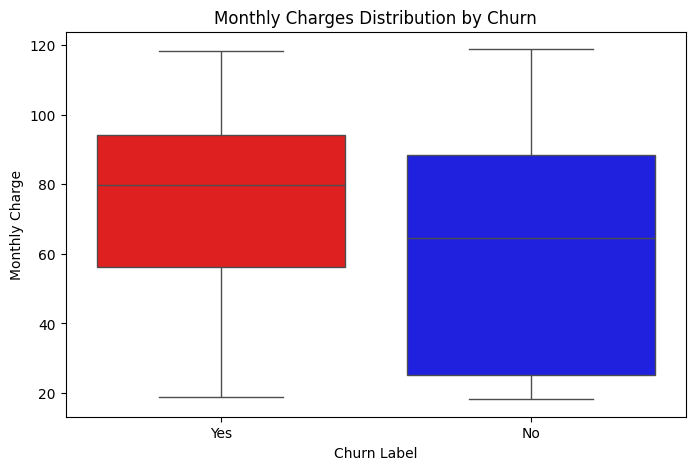

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn Label', y='Monthly Charge', data=df, palette=['red', 'blue'])
plt.title('Monthly Charges Distribution by Churn')
plt.show()


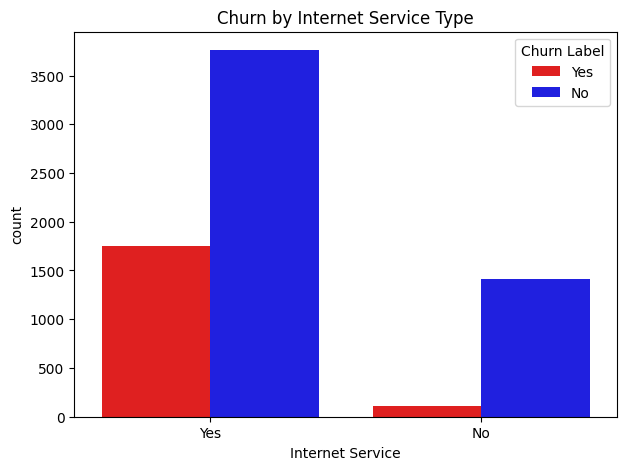

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(x='Internet Service', hue='Churn Label', data=df, palette=['red', 'blue'])
plt.title('Churn by Internet Service Type')
plt.show()


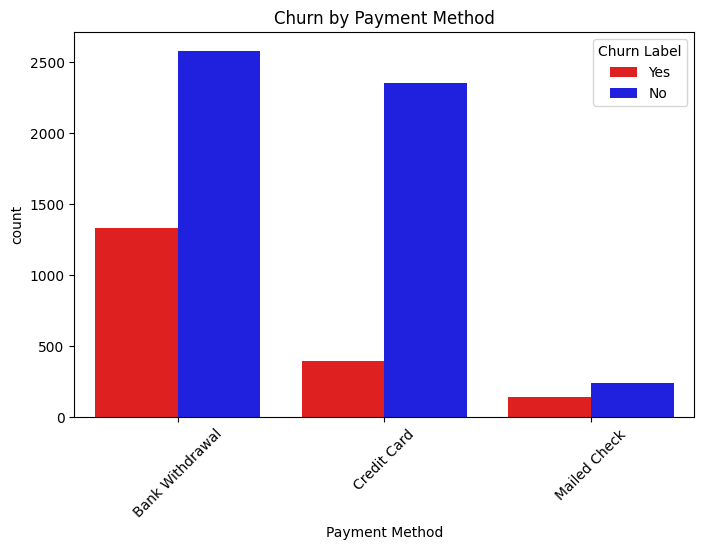

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x='Payment Method', hue='Churn Label', data=df, palette=['red', 'blue'])
plt.xticks(rotation=45)
plt.title('Churn by Payment Method')
plt.show()


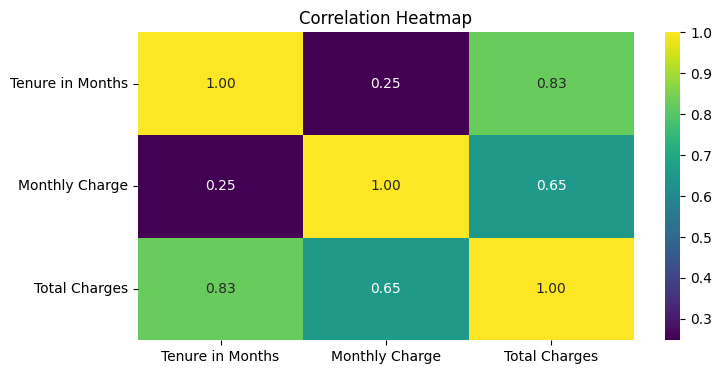

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.heatmap(df[["Tenure in Months", "Monthly Charge", "Total Charges"]].corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [20]:
df.head(2)

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.0,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.8,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer


In [22]:
# Analyze numeric vs categorical columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()


In [23]:
# Exclude 'Customer ID' and target variable from feature lists
if 'Customer ID' in categorical_cols:
    categorical_cols.remove('Customer ID')
if 'Churn Label' in categorical_cols:
    categorical_cols.remove('Churn Label') # Target variable

print(f"\nNumeric Columns: {numeric_cols}")
print(f"Categorical Columns (excluding Customer ID and Churn Label): {categorical_cols}")



Numeric Columns: ['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude', 'Population', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Score', 'CLTV']
Categorical Columns (excluding Customer ID and Churn Label): ['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Country', 'State', 'City', 'Quarter', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Customer Status', 'Churn Category', 'Churn Reason']


In [24]:
# Check for target imbalance
print("\nTarget Variable Distribution ('Churn Label'):")
print(df['Churn Label'].value_counts())
print(df['Churn Label'].value_counts(normalize=True) * 100)



Target Variable Distribution ('Churn Label'):
Churn Label
No     5174
Yes    1869
Name: count, dtype: int64
Churn Label
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [25]:
# Convert 'Total Charges' to numeric, coercing errors to NaN
# Based on the sample data, 'Total Charges' might be read as object due to empty strings or non-numeric characters
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')


In [26]:
# Handle missing values in 'Total Charges' after conversion (e.g., fill with median or mean)
df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)
print("\nMissing values in 'Total Charges' handled.")



Missing values in 'Total Charges' handled.


In [27]:
features = [
    'Gender', 'Senior Citizen', 'Married', 'Dependents', 'Tenure in Months',
    'Phone Service', 'Internet Service', 'Contract', 'Monthly Charge', 'Total Charges'
]
target = 'Churn Label'

X = df[features]
y = df[target].apply(lambda x: 1 if x == 'Yes' else 0) # Convert 'Yes'/'No' to 1/0


In [28]:
# Identify numerical and categorical features for preprocessing
numerical_features = ['Tenure in Months', 'Monthly Charge', 'Total Charges']
categorical_features = [col for col in X.columns if col not in numerical_features]


In [29]:
# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


In [30]:
# --- 2. Data Preprocessing ---
print("\n--- 2. Data Preprocessing ---")

features = [
    'Gender', 'Senior Citizen', 'Married', 'Dependents', 'Tenure in Months',
    'Phone Service', 'Internet Service', 'Contract', 'Monthly Charge', 'Total Charges'
]
target = 'Churn Label'

X = df[features]
y = df[target].apply(lambda x: 1 if x == 'Yes' else 0)

numerical_features = ['Tenure in Months', 'Monthly Charge', 'Total Charges']
categorical_features = [col for col in X.columns if col not in numerical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])



--- 2. Data Preprocessing ---


In [40]:
# Split the dataset into Train-Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Data split into training (shape: {X_train.shape}) and testing (shape: {X_test.shape}) sets.")


Data split into training (shape: (5634, 10)) and testing (shape: (1409, 10)) sets.


In [34]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE


In [35]:
# --- 3. Model Building with SMOTE ---
print("\n--- 3. Model Building (with SMOTE) ---")

# Build Imbalanced Pipeline
model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])


--- 3. Model Building (with SMOTE) ---


In [41]:
# Train the model
print("Training Logistic Regression model with SMOTE...")
model_pipeline.fit(X_train, y_train)
print("Model training complete.")

Training Logistic Regression model with SMOTE...
Model training complete.


In [42]:
# Predictions
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]
y_pred = model_pipeline.predict(X_test)

In [51]:
# --- 4. Evaluation ---
print("\n--- 4. Evaluation ---")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


--- 4. Evaluation ---
Accuracy: 0.8155
Precision: 0.6696
Recall: 0.6016
F1-Score: 0.6338
ROC-AUC: 0.4999


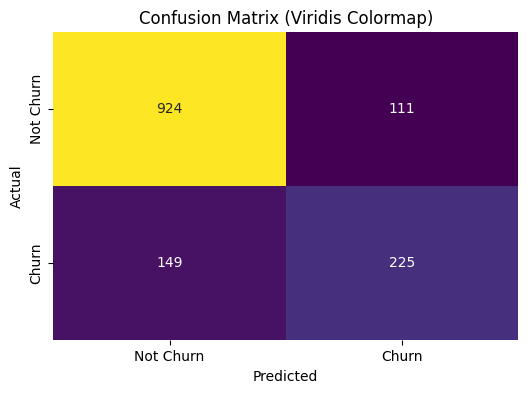

In [49]:
# Plot a Confusion Matrix with a new color scheme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False,
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Viridis Colormap)')
plt.show()